# Importing packages and data

In [ ]:
## The magic four
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

# Train Test Split 
from sklearn.model_selection import train_test_split

#Scaler 
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## Metrics 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score)

## StatsModels & SkLearn
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

#needed to import and read .xslx file
import openpyxl

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def apr(y_real, y_pred):
    accuracy = accuracy_score(y_real, y_pred)
    precision = precision_score(y_real, y_pred)
    recall = recall_score(y_real, y_pred)
    f1 = f1_score(y_real, y_pred)
    
    print(f"Accuracy:{accuracy}")
    print(f"Precision:{precision}")
    print(f"Recall:{recall}")
    print(f"F1:{f1}")
    return accuracy, precision, recall, f1

In [ ]:
#this is an aesthetic choice and just removes the many warnings that some functions and comands produce
#it helps significantly declutter the workbook
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#reading in the excel file into a DataFrame
#commented out so it doesn't create it every time
myDF = pd.read_excel('customer_churn.xlsx', header = 0)

In [ ]:
#visual inspection of the DataFrame
len(myDF)

7043

# Data Cleaning

In [ ]:
#creating a copy of the dataset to work on
churn = myDF.copy()
#removing useless columns
try:
    churn.drop(columns = ['Churn Label','CustomerID', 'Count', 'Country', 'State','City','Lat Long', 'Latitude', 'Longitude', 'Churn Reason'], inplace = True)
except:
    print('Already dropped!')

# Exploratory Data Analysis

In [ ]:
## Check for number of nulls in each column
myDF.isnull().sum()

In [ ]:
#checking data types for each column
churn.dtypes

In [ ]:
#descriptive statistics of the dataset
churn.describe()

In [ ]:
#descriptive statistics of the set of people who left
churn[churn['Churn Value'] == 1].describe()

In [ ]:
#checking for data type and number of unique values
 for i in churn.columns:
     print('column',i, 'of type',churn[i].dtypes, 'has', len(churn[i].unique()),'unique value(s)')

# DEMOGRAPHICS - graphs have later been made better in Tableau

In [ ]:
## Country of the customers:
myDF['Country'].value_counts()
# All Customers are in USA

United States    7043
Name: Country, dtype: int64

In [ ]:
## State of the customers:
myDF['State'].value_counts()
# All customers are in California

California    7043
Name: State, dtype: int64

In [ ]:
'''## City of the customers:
myDF['City'].value_counts()
bc = myDF['City'].value_counts().plot.bar()
# Majority of customers live in Los Angeles'''

"## City of the customers:\nmyDF['City'].value_counts()\nbc = myDF['City'].value_counts().plot.bar()\n# Majority of customers live in Los Angeles"

In [ ]:
## Percentage of males and females:
customer_gender = myDF['Gender'].value_counts() / myDF['Gender'].count()
customer_gender
# Male      0.504756
# Female    0.495244

Male      0.504756
Female    0.495244
Name: Gender, dtype: float64

In [ ]:
#Number of males and females that churned
myDF.groupby('Churn Value')['Gender'].value_counts()


Churn Value  Gender
0            Male      2625
             Female    2549
1            Female     939
             Male       930
Name: Gender, dtype: int64

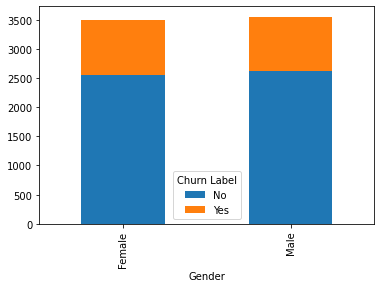

In [ ]:
gender_churn = myDF.groupby(['Gender', 'Churn Label'])['Gender'].count().unstack('Churn Label')
gender_churn.plot(kind = "bar", stacked = True)

In [ ]:
## churners/no churners by tenure months:
myDF.groupby('Churn Value')['Tenure Months'].describe()

# During the first months churning is more likely to happen
# No Churn - Mean 37.56, Median 38
# Churn - Mean 17,97, Median 10
# Seems to be outliers in the churners

,count,mean,std,min,25%,50%,75%,max
Churn Value,,,,,,,,
0,5174.0,37.569965,24.113777,0.0,15.0,38.0,61.0,72.0
1,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0


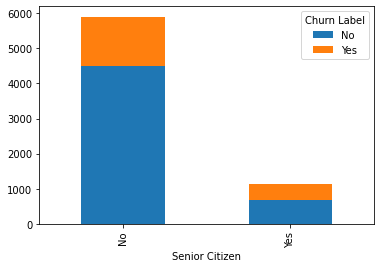

In [ ]:
## Churners/no churners by Senior Citizen:
myDF.groupby(['Senior Citizen'])['Churn Label'].value_counts()
#Senior Citizen  Churn Label
#No              No             4508
#                Yes            1393
#Yes             No              666
#                Yes             476
customer_senior = myDF.groupby(['Senior Citizen', 'Churn Label'])['Senior Citizen'].count().unstack('Churn Label')
customer_senior.plot(kind='bar', stacked=True)

In [ ]:
# customer_senior_citizen = myDF['Senior Citizen'].value_counts() / myDF['Senior Citizen'].count()
# customer_senior_citizen

In [ ]:
#gender demographics of senior residents
#again similar trends as seen above for male vs female when broken down by age. 
myDF.groupby(['Senior Citizen', 'Gender'])['Churn Label'].value_counts()

Senior Citizen  Gender  Churn Label
No              Female  No             2221
                        Yes             699
                Male    No             2287
                        Yes             694
Yes             Female  No              328
                        Yes             240
                Male    No              338
                        Yes             236
Name: Churn Label, dtype: int64

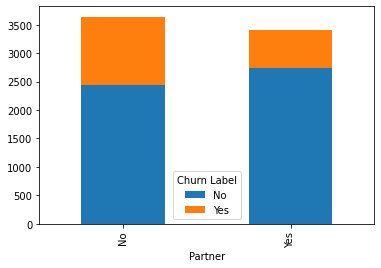

In [ ]:
## Churners/no churners by Partner:
myDF.groupby(['Partner'])['Churn Label'].value_counts()

# Partner  Churn Label
# No       No             2441
#          Yes            1200
# Yes      No             2733
#          Yes             669
customer_partner = myDF.groupby(['Partner', 'Churn Label'])['Partner'].count().unstack('Churn Label')
customer_partner.plot(kind='bar', stacked=True)

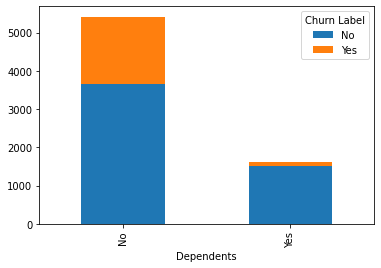

In [ ]:
## Churners/no churners by Dependents:
myDF.groupby(['Dependents'])['Churn Label'].value_counts()
# Dependents  Churn Label
# No          No             3653
#             Yes            1763
# Yes         No             1521
#             Yes             106
customer_dependents = myDF.groupby(['Dependents', 'Churn Label'])['Dependents'].count().unstack('Churn Label')
customer_dependents.plot(kind='bar', stacked=True)

In [ ]:
myDF['Churn Reason'].value_counts()

Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Limited range of services                     44
Long distance charges                         44
Lack of affordable download/upload speed      44
Poor expertise of phone support               20
Poor expertise of online support              19
Deceased                                       6
Name: Churn Reason, 

Churn Label
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Monthly Charges, dtype: object

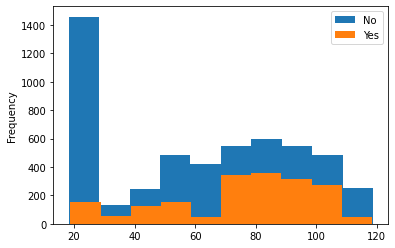

In [ ]:
## Churners/no churners by monthly charges
myDF.groupby('Churn Label')['Monthly Charges'].value_counts()

myDF.groupby('Churn Label')['Monthly Charges'].plot(kind='hist', stacked=True, legend = True)

Churn Label
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Tenure Months, dtype: object

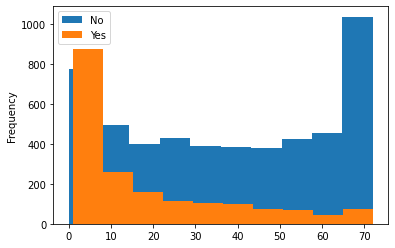

In [ ]:
## Churners/no churners by tenure months:
myDF.groupby('Churn Label')['Tenure Months'].value_counts()

myDF.groupby('Churn Label')['Tenure Months'].plot(kind='hist', stacked=True, legend = True)

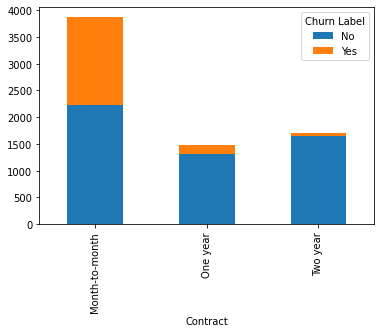

In [ ]:
# Churners/no churners by type of contract:
myDF.groupby('Churn Label')['Contract'].value_counts()

test = myDF.groupby(['Contract', 'Churn Label'])['Contract'].count().unstack('Churn Label')
test.plot(kind='bar', stacked=True) 

# Train-test split

In [ ]:
# Split into X & y 

X = churn.drop('Churn Value',axis=1)
y = churn['Churn Value']


#Apply Train Test Split 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=420)


# Here we save the split data to then use it in other classification models.
# Feature engineering and scaling will be done again so we can choose which predictors to use for each different model.

In [ ]:
'''X_train.to_csv('X_train.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False)'''

"X_train.to_csv('X_train.csv', index=False)\ny_train.to_csv('y_train.csv', index=False)\nX_test.to_csv('X_test.csv', index=False)\ny_test.to_csv('y_test.csv', index=False)"

# Feature Engineering

In [ ]:
#function to automatically create dummies to chosen columns
def one_hot(df, col):
    new_df = pd.get_dummies(df, columns=col, prefix=col[0])
    return new_df

#main feature engineering function
def feature_eng(df):

    df = df.copy()
    
    df = sm.add_constant(df)

    df['Total Charges'] = df['Total Charges'].apply(pd.to_numeric, errors = 'coerce')
    df['Total Charges'].fillna(0, inplace = True)

    
    to_be_dummied = [
                    'Gender',
                    'Senior Citizen', 
                    'Partner', 
                    'Dependents',
                    'Phone Service',
                    'Multiple Lines', 
                    'Internet Service', 
                    'Online Security', 
                    'Online Backup', 
                    'Device Protection', 
                    'Tech Support', 
                    'Streaming TV', 
                    'Streaming Movies', 
                    'Contract', 
                    'Paperless Billing', 
                    'Payment Method'
                     ]

    feature_cols = list(df.columns)
    
    one_hot_targets = []
    not_hot_cols = []

    for i in feature_cols:
        if i in to_be_dummied:
            one_hot_targets.append(i)
        else:
            not_hot_cols.append(i)


    for target in one_hot_targets:
        new = one_hot(df[target], [target])
        df.drop(columns=target, inplace=True)
        feature_cols.remove(target)
        new_list = feature_cols + list(new.columns)
        feature_cols = new_list.copy()
        df = pd.concat([df, new], axis=1, join="inner")

    df['Payment Method_Automatic'] = df['Payment Method_Bank transfer (automatic)'] + df['Payment Method_Credit card (automatic)']
    df['Payment Method_Manual'] = df['Payment Method_Electronic check'] + df['Payment Method_Mailed check']

    final_cols = [  
                    'const',
                    'Monthly Charges', 
                    #'Total Charges', 
                    'Tenure Months', 
                    #'Churn Value',
                    #'Gender_Female', 
                    #'Gender_Male', 
                    #'Senior Citizen_No',
                    #'Senior Citizen_Yes', 
                    #'Partner_No', 
                    'Partner_Yes', 
                    #'Dependents_No',
                    'Dependents_Yes', 
                    #'Phone Service_No', 
                    #'Phone Service_Yes',
                    #'Multiple Lines_No', 
                    #'Multiple Lines_No phone service',   
                    'Multiple Lines_Yes', 
                    #'Internet Service_DSL',
                    'Internet Service_Fiber optic', 
                    #'Internet Service_No',
                    #'Online Security_No', 
                    #'Online Security_No internet service',
                    'Online Security_Yes', 
                    #'Online Backup_No',
                    #'Online Backup_No internet service', 
                    #'Online Backup_Yes',
                    #'Device Protection_No', 
                    #'Device Protection_No internet service',
                    #'Device Protection_Yes', 
                    #'Tech Support_No',
                    #'Tech Support_No internet service', 
                    'Tech Support_Yes',
                    #'Streaming TV_No',
                    #'Streaming TV_No internet service',
                    #'Streaming TV_Yes', 
                    #'Streaming Movies_No',
                    #'Streaming Movies_No internet service', 
                    'Streaming Movies_Yes',
                    'Contract_Month-to-month', 
                    #'Contract_One year',
                    #'Contract_Two year',
                    #'Paperless Billing_No', 
                    'Paperless Billing_Yes',
                    #'Payment Method_Bank transfer (automatic)',
                    #'Payment Method_Credit card (automatic)',
                    #'Payment Method_Electronic check', 
                    #'Payment Method_Mailed check'
                    #'Payment Method_Automatic',
                    'Payment Method_Manual'
                    ]

    for col in final_cols: 
        if col not in df.columns:
            df[col] = 0

    df = df[final_cols]

    return df

In [ ]:
#applying the feature engineering
X_train_eng = feature_eng(X_train)
X_test_eng = feature_eng(X_test)

# Scaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
# this code serves to separate the constant from the dataframe
# if the consant is scaled it is reduced to 0 and becomes useless
# here we also re-index the scaled dataframe since it loses the index when scaled
if 'const' in list(X_train_eng.columns) and 'const' in list(X_test_eng.columns):

    # Fit and scale the training data
    c = pd.DataFrame(X_train_eng['const'])
    c.reset_index(drop = True, inplace = True)

    X_train_eng.drop(columns = 'const', inplace = True)

    scaled_X_train = scaler.fit_transform(X_train_eng)

    precols = list(X_train_eng.columns)
    scaled_X_train = pd.DataFrame(scaled_X_train, columns= precols)

    scaled_X_train = pd.concat([c,scaled_X_train], axis = 1)

    scaled_X_train.set_index(X_train_eng.reset_index()['index'], inplace = True)

    # Scale the test data 

    k = pd.DataFrame(X_test_eng['const'])
    k.reset_index(drop = True, inplace = True)

    X_test_eng.drop(columns = 'const', inplace = True)

    scaled_X_test = scaler.transform(X_test_eng)

    scaled_X_test = pd.DataFrame(scaled_X_test, columns= precols)

    scaled_X_test = pd.concat([k,scaled_X_test], axis = 1)

    scaled_X_test.set_index(X_test_eng.reset_index()['index'], inplace = True)

else:
    precols = list(X_train_eng.columns)
    
    scaled_X_train = scaler.fit_transform(X_train_eng)
    scaled_X_train = pd.DataFrame(scaled_X_train, columns= precols)
    
    scaled_X_train.set_index(X_train_eng.reset_index()['index'], inplace = True)

    scaled_X_test = scaler.transform(X_test_eng)
    scaled_X_test = pd.DataFrame(scaled_X_test, columns= precols)
    
    scaled_X_test.set_index(X_test_eng.reset_index()['index'], inplace = True)

# Model creation

In [ ]:
#creating the logistic regression model
def run_model(dfx, dfy):
  y = dfy
  X = dfx
  return sm.Logit(y, X).fit()

# Model running

In [ ]:
list(scaled_X_train.columns)

['const',
 'Monthly Charges',
 'Tenure Months',
 'Partner_Yes',
 'Dependents_Yes',
 'Multiple Lines_Yes',
 'Internet Service_Fiber optic',
 'Online Security_Yes',
 'Tech Support_Yes',
 'Streaming Movies_Yes',
 'Contract_Month-to-month',
 'Paperless Billing_Yes',
 'Payment Method_Manual']

In [ ]:
#model running
test_0 = run_model(scaled_X_train,y_train)
print(test_0.summary())

Optimization terminated successfully.
         Current function value: 0.411438
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            Churn Value   No. Observations:                 5282
Model:                          Logit   Df Residuals:                     5269
Method:                           MLE   Df Model:                           12
Date:                Tue, 17 Aug 2021   Pseudo R-squ.:                  0.2866
Time:                        11:20:43   Log-Likelihood:                -2173.2
converged:                       True   LL-Null:                       -3046.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -2.2037      0.159    -13.826      0.000

In [ ]:
# correlation plot to check if variables are too highly correlated and cause issues
plt.figure(figsize=(15, 15))
sns.heatmap(scaled_X_train.corr(), annot = True,  square = True)
plt.show()

# Metrics creation

In [ ]:
#ended up not working properly so has not been used

##positive label = y = 1 class 
##negative label = y = 0 class 

## y = Churned. 
## y = 1 'Churned'
## y = 0 'Stayed':('

def produce_confusion(positive_label, negative_label, cut_off, dfx, dfy, y_pred_name):
    
    #Set pred to 0 or 1 depending on whether it's higher than the cut_off point.
    dfx['pred_binary'] = np.where(dfy > cut_off , 1, 0)
    
    #Build the CM
    cm = confusion_matrix(dfy, dfx['pred_binary'])  
    
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, fmt='g'); 

    # labels, title, ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('Real labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels([negative_label, positive_label])
    ax.yaxis.set_ticklabels([negative_label, positive_label]);

    print('Test accuracy = ', accuracy_score(dfy, dfx['pred_binary']))
    print('Test precision = ', precision_score(dfy, dfx['pred_binary']))
    print('Test recall = ', recall_score(dfy, dfx['pred_binary']))
    print('Test F1 score = ', f1_score(dfy, dfx['pred_binary']))

    return accuracy_score(dfy, dfx['pred_binary'])

def metrics(dfx, dfy, model, cut_off, feature_cols):


    params = model.params
    model.summary()
    
    dfx['prediction'] = model.predict(dfx[feature_cols])
    #def produce_confusion(positive_label, negative_label, cut_off, dfx, dfy, y_pred_name):
    accuracy = produce_confusion('Churned', 'Stayed', cut_off, dfx, dfy, 'Churn Value')
    dfx['pred_bins'] = pd.cut(dfx['prediction'], np.arange(0.05,0.95,0.05))
    dfx = pd.concat([dfx, dfy], axis =1, join="inner" )
    summary = dfx.groupby('pred_bins').agg({'Churn Value':'mean', 'prediction':['mean','count']})
    summary = summary.reset_index()
    summary.columns = ['pred_bins','%_Churned','avg_prediction','count']
    
    #start bubble chart
    plt.figure(figsize=(5, 5), dpi=70)
    plt.axis([0, 1, 0, 1])
    plt.scatter(summary['avg_prediction'], summary['%_Churned'], s=summary['count'])
    plt.plot(summary['avg_prediction'], summary['avg_prediction'], color='grey')
    plt.xlabel('Logistic model probabilities')
    plt.ylabel('% Churned')
    plt.show()

    #start AUC
    logit_roc_auc = roc_auc_score(dfx['Churn Value'], dfx['prediction'])
    fpr, tpr, thresholds = roc_curve(dfx['Churn Value'], dfx['prediction'])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Metrics running

In [ ]:
feature_cols = list(scaled_X_train.columns)
feature_cols

['const',
 'Monthly Charges',
 'Tenure Months',
 'Partner_Yes',
 'Dependents_Yes',
 'Multiple Lines_Yes',
 'Internet Service_Fiber optic',
 'Online Security_Yes',
 'Tech Support_Yes',
 'Streaming Movies_Yes',
 'Contract_Month-to-month',
 'Paperless Billing_Yes',
 'Payment Method_Manual']

In [ ]:
# only the scores have been used since the metrics function did not work properly
train_pred = test_0.predict(scaled_X_train)
train_pred_bin = np.where(train_pred > 0.5, 1, 0)
apr(y_train, train_pred_bin)

Accuracy:0.8038621734191594
Precision:0.6578014184397163
Recall:0.5330459770114943
F1:0.5888888888888888


(0.8038621734191594,
 0.6578014184397163,
 0.5330459770114943,
 0.5888888888888888)

In [ ]:
#test scores
test_pred = test_0.predict(scaled_X_test)
test_pred_bin = np.where(test_pred > 0.555, 1, 0)
apr(y_test, test_pred_bin)

Accuracy:0.8103350369108461
Precision:0.7284345047923323
Recall:0.4779874213836478
F1:0.5772151898734178


(0.8103350369108461,
 0.7284345047923323,
 0.4779874213836478,
 0.5772151898734178)

# Finding churn risk score for top 500 customers

In [ ]:
# similar to above, the constant must not be scaled and is therefore removed and put back after the scaling
loyal = churn[churn['Churn Value'] == 0]
loyal_eng = feature_eng(loyal)

k = pd.DataFrame(loyal_eng['const'])
k.reset_index(drop = True, inplace = True)

loyal_eng.drop(columns = 'const', inplace = True)

loyal_cols = list(loyal_eng.columns)

scaled_loyal_eng = scaler.transform(loyal_eng)

scaled_loyal_eng = pd.DataFrame(scaled_loyal_eng, columns= loyal_cols)
scaled_loyal_eng = pd.concat([k,scaled_loyal_eng], axis = 1)
scaled_loyal_eng.set_index(loyal_eng.reset_index()['index'], inplace = True)

scaled_loyal_eng

,const,Monthly Charges,Tenure Months,Partner_Yes,Dependents_Yes,Multiple Lines_Yes,Internet Service_Fiber optic,Online Security_Yes,Tech Support_Yes,Streaming Movies_Yes,Contract_Month-to-month,Paperless Billing_Yes,Payment Method_Manual
index,,,,,,,,,,,,,
1869,1.0,0.115595,0.013889,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
1870,1.0,0.385650,0.472222,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1871,1.0,0.239661,0.625000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1872,1.0,0.706029,0.305556,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1873,1.0,0.114599,0.138889,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0.028899,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7039,1.0,0.663179,0.333333,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
7040,1.0,0.846537,1.000000,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
#adding customer ID to the dataframe
loyal_id = myDF['CustomerID'][myDF['Churn Value'] == 0]
test = scaled_loyal_eng.join(loyal_id)
test.sort_values('Churn Probability', ascending= False, inplace = True)

In [ ]:
#creating top 500 dataframe
churn_list = test[['CustomerID', 'Churn Probability']].head(500)
churn_list

,CustomerID,Churn Probability
index,,
3712,8622-ZLFKO,0.837465
4198,5150-ITWWB,0.825548
3732,4927-WWOOZ,0.819388
4714,0365-BZUWY,0.807560
4341,2545-EBUPK,0.806115
...,...,...
2842,1907-YLNYW,0.502420
2056,0221-WMXNQ,0.502363
6025,9752-ZNQUT,0.502128


In [ ]:
#saving the dataframe as csv
churn_list.to_csv('Logit_top_500.csv', index = False)

In [ ]:
#link to SVM notebook on Google Colab
#https://colab.research.google.com/drive/1ldtXbVWAV7aBoUZXI3khKVxP9hcypgV9?usp=sharing